In [1]:
# %matplotlib widget
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import glob
from scipy import stats
from scipy.optimize import curve_fit
import scipy
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import read_data
from scipy.stats import itemfreq


In [2]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
plt.rcParams.update({'font.size': 15})

CB_color_cycle = ['#377eb8', '#ff7f00', '#4daf4a',
                  '#f781bf', '#a65628', '#984ea3',
                  '#999999', '#e41a1c', '#dede00']

In [3]:
# Give component names in the order they apear in the scorep output
components = ["spreadParticleForce", "collideAndStream", "interpolateFluidVelocity", "syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "setExternalVector"]
raw_df = read_data.gen_df("./results", components)

In [4]:
fitting_sizes = ["s3", "s5", "s8", "s11", "s12"]
testing_sizes = ["s2", "s4", "s6"]
fitting_df = raw_df[ raw_df['sizestr'].isin(fitting_sizes)]
testing_df = raw_df[ raw_df['sizestr'].isin(testing_sizes)]

data = []
for sizestr in np.sort(np.unique(raw_df['sizestr'])):
    tmp = raw_df.loc[raw_df['sizestr'] == sizestr]
    s = np.array(tmp['size'])[0]
    N = np.array(tmp['N'])[0]

    
    for H in np.sort(np.unique(raw_df.loc[raw_df['sizestr'] == sizestr]['H'])):
        n = np.unique(tmp.loc[tmp['H'] == H]['jobid']).size
        rbc = np.array(tmp.loc[tmp['H'] == H]['RBCs'])[0]


        data.append([sizestr, s, N, H, rbc, n])
        

exp_df = pd.DataFrame(data, columns=['sizestr', 'size', 'N', 'H', 'RBCs', 'n']).sort_values('N')
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(exp_df)

,sizestr,size,N,H,RBCs,n
0,s1,"(25, 50, 25)",31250,0,0.000000,2
1,s1,"(25, 50, 25)",31250,9,2.916667,2
2,s1,"(25, 50, 25)",31250,10,3.500000,2
3,s1,"(25, 50, 25)",31250,12,4.083333,2
4,s1,"(25, 50, 25)",31250,14,4.666667,2
5,s1,"(25, 50, 25)",31250,16,5.250000,1
6,s1,"(25, 50, 25)",31250,18,5.833333,1
13,s2,"(25, 50, 50)",62500,18,14.583333,1
12,s2,"(25, 50, 50)",62500,16,13.125000,1
11,s2,"(25, 50, 50)",62500,14,11.666667,2


# Fitting

collideAndStream
8.410767112723903 + (xs \times ys \times zs) * 0.000243599592469948
setExternalVector
-0.0018714340501890803 + (xs \times ys \times zs) * 2.212936590362688e-05
collideAndStream
1.8788738853958238 + (xs, ys, zs) * 0.00019147592143209757
syncEnvelopes
0.04314096372218579 + RBCs * 0.032347993183340834
advanceParticles
0.870122857709724 + RBCs * 0.08107073066009235
applyConstitutiveModel
-0.005652781067482682 + RBCs * 0.028543641356869376
deleteNonLocalParticles
0.018324176357214172 + RBCs * 0.00955070919363908
spreadParticleForce
1.9190114608473792 + RBCs * 0.24922208615532765
interpolateFluidVelocity
0.5156932442969357 + RBCs * 0.041379397332513446
syncEnvelopes
0.8595248374221147 + (xs, ys, zs) * 2.7250160788507974e-05 + RBCs * 0.0058375201507598045


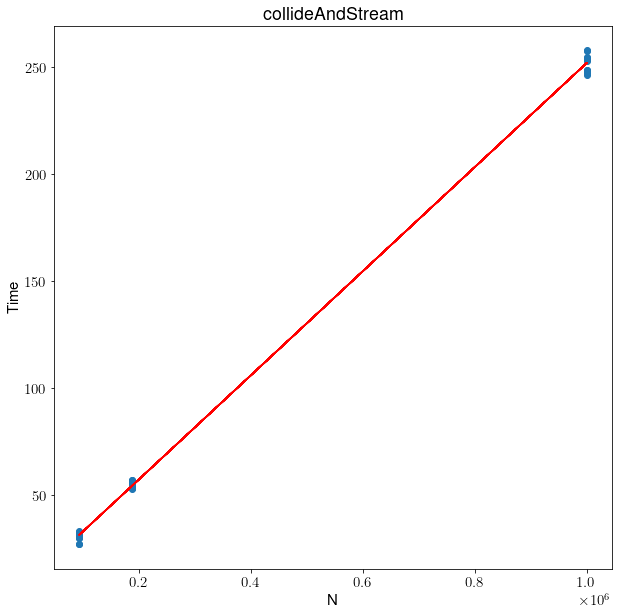

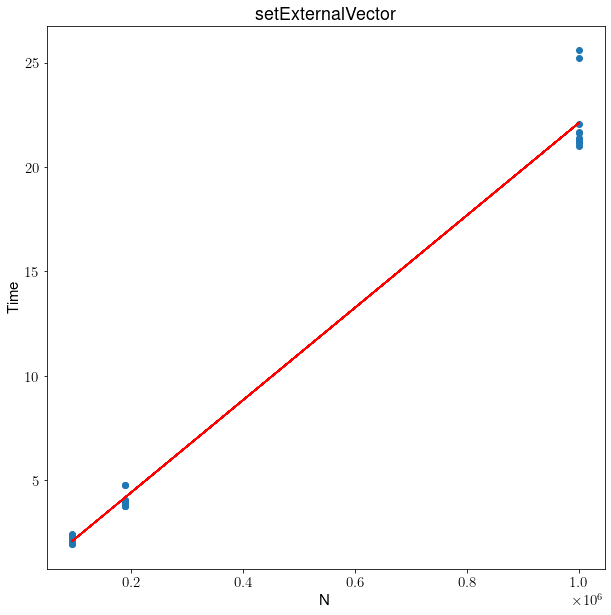

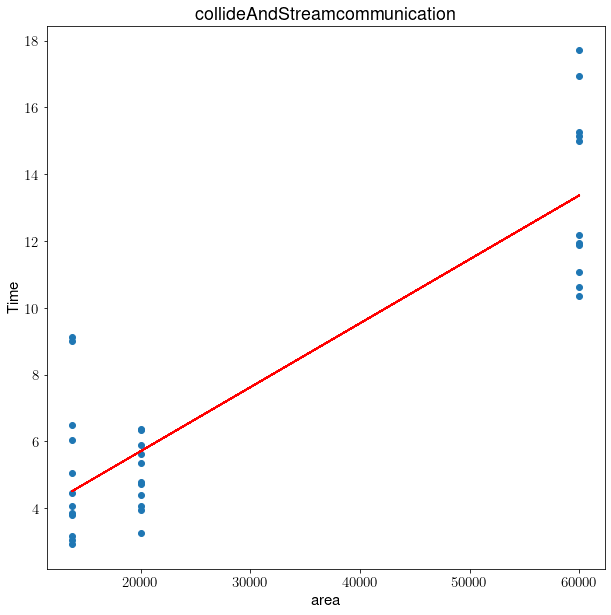

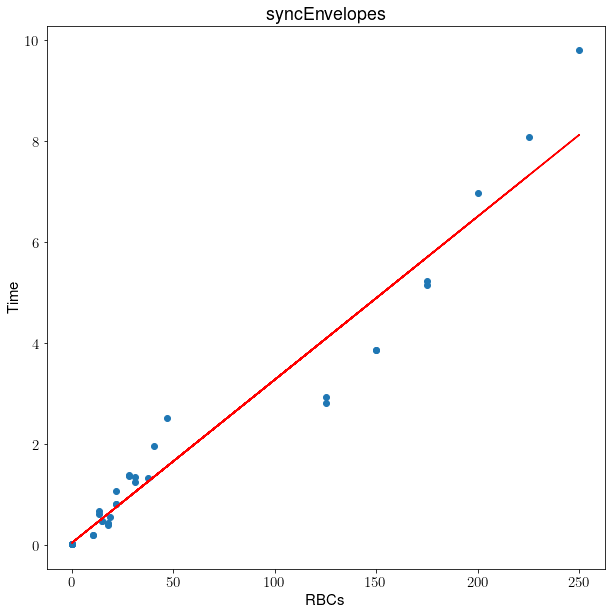

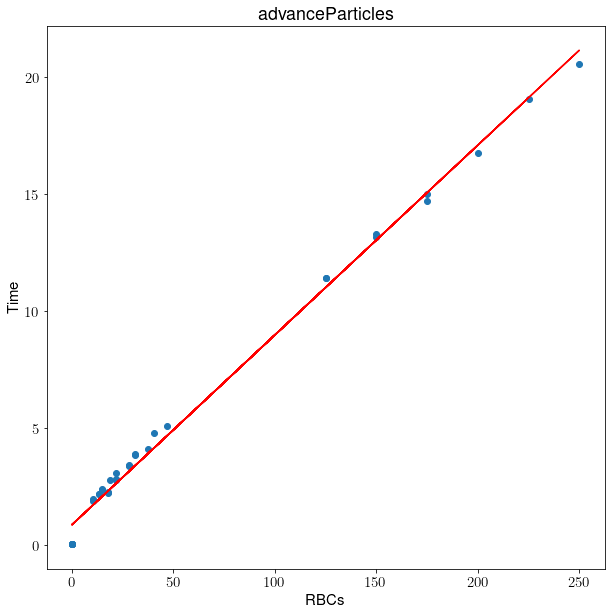

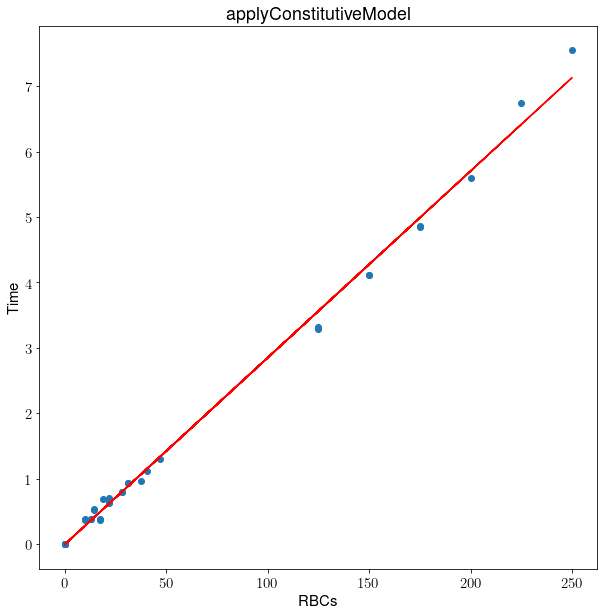

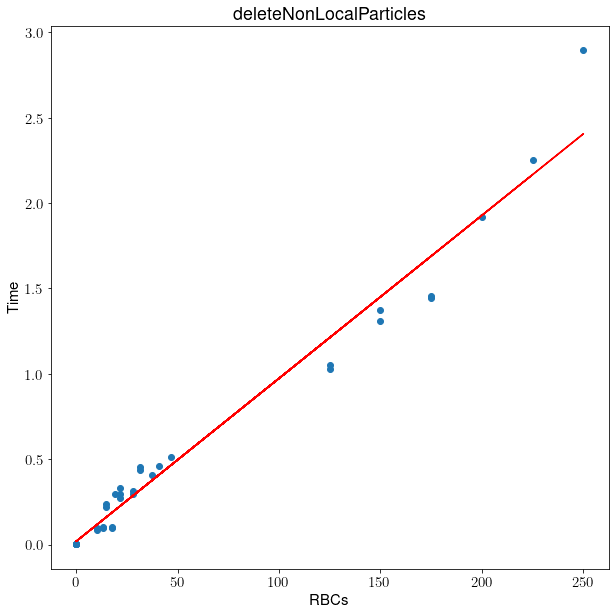

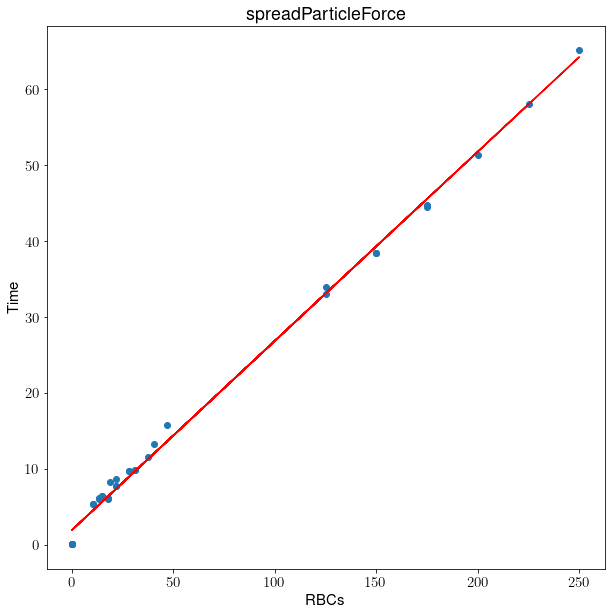

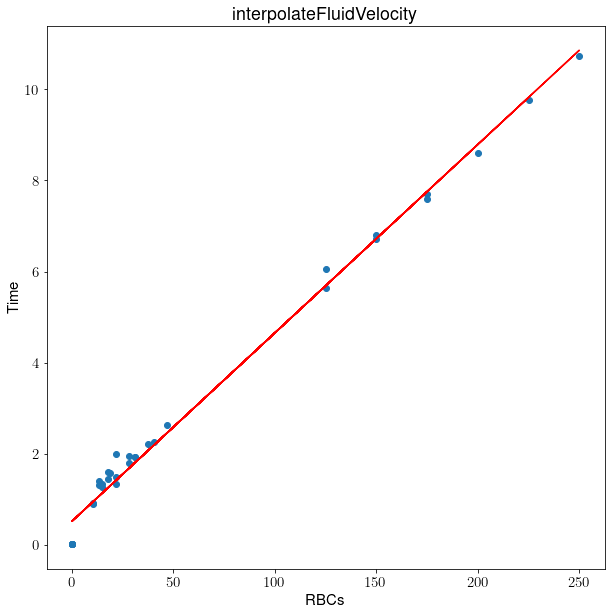

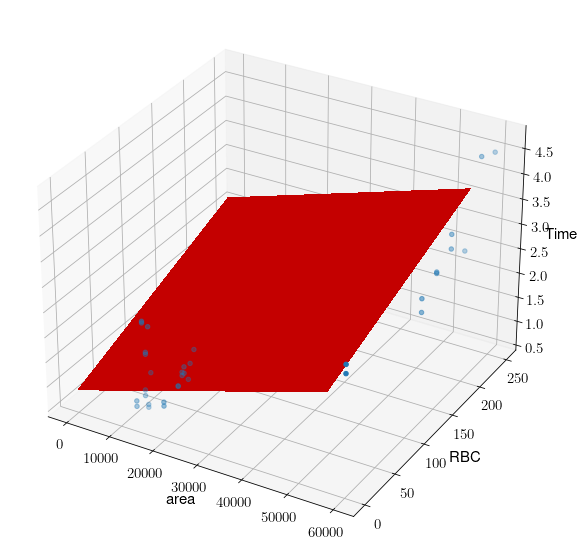

In [5]:
models = {}

for component in ["collideAndStream", "setExternalVector"]:
    plt.figure(figsize=(10, 10))
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]    
    plt.scatter(tmpdf['N'], tmpdf['comp'])
    
    res = stats.linregress(tmpdf['N'], tmpdf['comp'])
    plt.plot(tmpdf['N'], res.intercept + res.slope*tmpdf['N'], 'r', label='fitted line')
    models[component] = res

    plt.title(str(component))
    plt.xlabel("N")
    plt.ylabel("Time")
#     plt.show()

    print(component)
    print("{} + (xs \\times ys \\times zs) * {}".format(res.intercept, res.slope))
    

for component in ["collideAndStream"]:
    plt.figure(figsize=(10, 10))
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]    
    plt.scatter(tmpdf['area'], tmpdf['comm'])

    res = stats.linregress(tmpdf['area'], tmpdf['comm'])
    models[component+"_comm"] = res
    plt.plot(tmpdf['area'], res.intercept + res.slope*tmpdf['area'], 'r', label='fitted line')
    
    plt.title(str(component) + "communication")
    plt.xlabel("area")
    plt.ylabel("Time")
#     plt.show()
    print(component)
    print("{} + (xs, ys, zs) * {}".format(res.intercept, res.slope))

    
for component in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
    plt.figure(figsize=(10, 10))
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]

    plt.scatter(tmpdf['RBCs'], tmpdf['comp'])
    
    res = stats.linregress(tmpdf['RBCs'], tmpdf['comp'])
    models[component] = res

    plt.plot(tmpdf['RBCs'], res.intercept + res.slope*tmpdf['RBCs'], 'r', label='fitted line')
    plt.title(str(component))
    plt.xlabel("RBCs")
    plt.ylabel("Time")
    print(component)
    print("{} + RBCs * {}".format(res.intercept, res.slope))

#     plt.show()

def function_calc(x, a, b, c):
    return a + b*x[0] + c*x[1]
    
for component in ["syncEnvelopes"]:
    plt.figure(figsize=(10, 10))
    ax = plt.axes(projection='3d')
    
    tmpdf = fitting_df.loc[fitting_df['component'] == component]    
    ax.scatter(tmpdf['area'], tmpdf['RBCs'], tmpdf['comm'])
    
    popt, pcov = curve_fit(function_calc, [tmpdf['area'],tmpdf['RBCs']], tmpdf['comm'])
    models[component+"_comm"] = popt
    # Make data.
    X = np.arange(0, 60000, 4000)
    Y = np.arange(0, 250, 12)
    X, Y = np.meshgrid(X, Y)
    Z = np.array(popt[0] + X*popt[1] + Y*popt[2])
    # Plot the surface.
    surf = ax.plot_surface(X, Y, Z, color='r', linewidth=0, antialiased=False)    
    ax.set_xlabel("area")
    ax.set_ylabel("RBC")
    ax.set_zlabel("Time")
#     plt.show()
    print(component)
    print("{} + (xs, ys, zs) * {} + RBCs * {}".format(popt[0], popt[1], popt[2]))


In [6]:
def run_model(models, size, RBCs):
    total = 0
    for component in ["collideAndStream", "setExternalVector"]:
        res = models[component]
        total += res.intercept + res.slope *  size[0] * size[1] * size[2]
    
    for component in ["collideAndStream_comm"]:
        res = models[component]
        total += res.intercept + res.slope *  2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))
        
    for component in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
        res = models[component]
        total += res.intercept + res.slope * RBCs
        
    for component in ["syncEnvelopes_comm"]:
        popt = models[component]
        total += popt[0] + 2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))*popt[1] + RBCs*popt[2]
    
    return total

<Figure size 1440x1440 with 0 Axes>

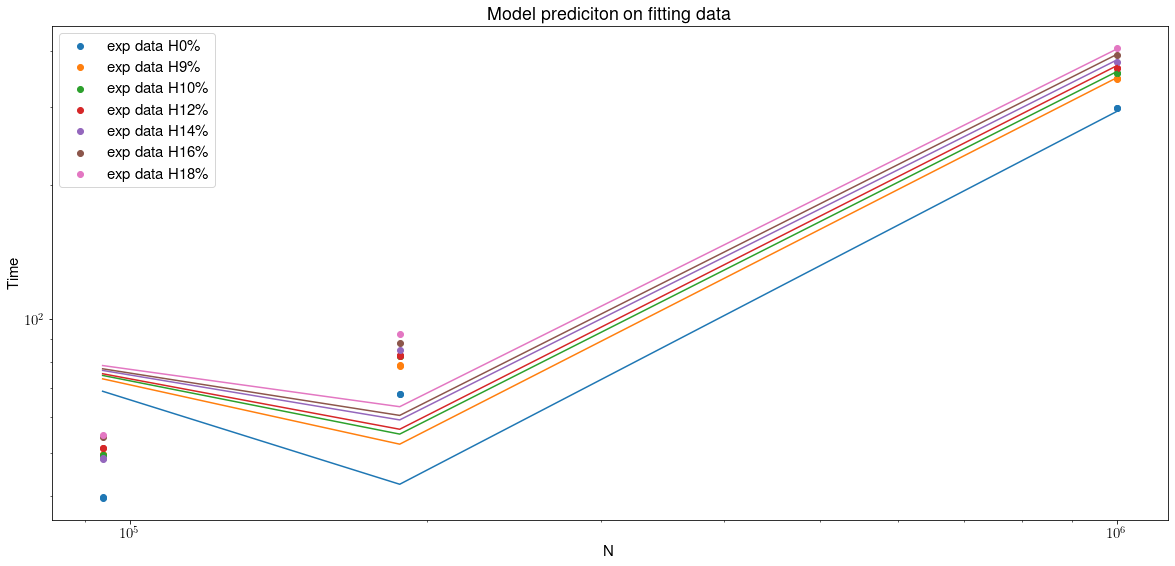

,size,RBCs,mean,std,prediction,mse
0,"(50, 75, 50)",0.000,67.681691,0.003638,68.706636,1.05
1,"(75, 25, 50)",0.000,39.629347,0.051567,42.427508,7.83
2,"(100, 100, 100)",0.000,298.235091,0.178619,293.360458,23.79
3,"(75, 25, 50)",21.875,54.687172,0.000000,52.226460,6.06
4,"(100, 100, 100)",125.000,347.853310,0.656780,349.354467,2.68
5,"(100, 100, 100)",150.000,357.180820,0.262430,360.553269,11.44
6,"(100, 100, 100)",175.000,367.301015,0.053105,371.752071,19.81
7,"(100, 100, 100)",200.000,379.563520,0.000000,382.950873,11.47
8,"(100, 100, 100)",225.000,393.401940,0.000000,394.149675,0.56
9,"(50, 75, 50)",21.875,78.443701,0.136306,78.505587,0.02


In [7]:
ids = np.unique(fitting_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)


new_data = []
for H in set(tmpdf['H']):
    d = tmpdf.loc[tmpdf['H'] == H]
    plt.scatter(d['N'], d['total'], label='exp data H{}\%'.format(H))
    setups = unique([list(x) for x in zip(d['N'], d['size'], d['RBCs'])])
    predictions = [ run_model(models, s, r) for _, s, r in setups]
    plt.plot(setups[:,0], predictions)
    
    for _, size, rbc in setups:
        tmp = tmpdf.loc[tmpdf['size'] == size]
        tmp = tmp.loc[tmpdf['RBCs'] == rbc]
        if len(tmp['total']) == 0:
            continue

        prediciton = run_model(models, size, rbc)
        mse = ((np.array(tmp['total']) - prediciton)**2).mean()
#         rse = ((tmp['total'] - prediciton) ** 2).sum() / ((tmp['total'] - tmp['total'].mean()) ** 2).sum()
        new_data.append([size, rbc, np.mean(tmp['total']), np.std(np.array(tmp['total'])), prediciton, mse.round(2)])


plt.legend()

plt.title("Model prediciton on fitting data")
plt.xlabel("N")
plt.ylabel("Time")
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

predictiondf = pd.DataFrame(new_data, columns=['size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
predictiondf

([<matplotlib.axis.XTick at 0x7f769c8c5d00>,
 [Text(0, 0, '(75, 25, 50)'),
  Text(1, 0, '(50, 75, 50)'),
  Text(2, 0, '(100, 100, 100)')])

<Figure size 1440x1440 with 0 Axes>

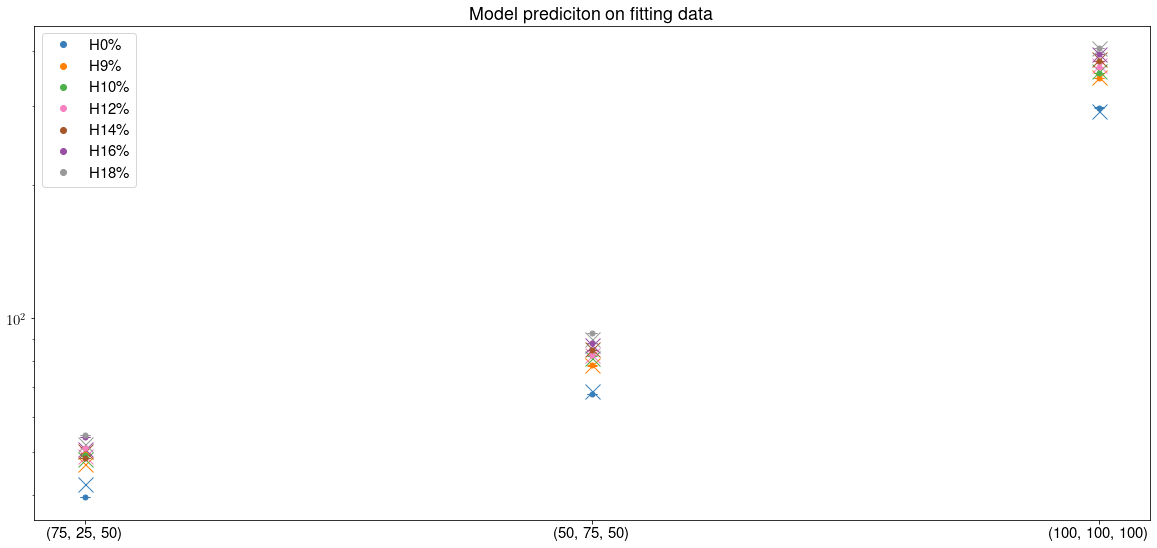

In [8]:
ids = np.unique(fitting_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(fitting_sizes)].sort_values("N")
# print(fit_exp_df)


for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        plt.errorbar(i, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=10, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1, )
        plt.plot(i, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=15)
        
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', label='H{}\%'.format(H)))
        

plt.title("Model prediciton on fitting data")
plt.legend(handles=legend_handels)
ax.set_yscale('log')
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
plt.xticks(range(np.unique(np.sort(fit_exp_df['sizestr'])).size), [np.array(fit_exp_df.loc[fit_exp_df['sizestr']==x]['size'])[0] for x in pd.unique(fit_exp_df['sizestr'])])


In [9]:
ids = np.unique(fitting_df['jobid'])

new_data = []

sizes = np.unique(fitting_df['size'])
RBCs = np.unique(fitting_df['RBCs'])

for c in components:
    for size in sizes:
        for RBC in RBCs:
            tmpdf = fitting_df.loc[fitting_df['component'] == c]
            tmpdf = tmpdf.loc[tmpdf['size'] == size]
            tmpdf = tmpdf.loc[tmpdf['RBCs'] == RBC]
            if len(tmpdf['comp']) == 0:
                continue
            
            if c in ["collideAndStream", "setExternalVector"]:
                res = models[c]
                prediction = res.intercept + res.slope *  size[0] * size[1] * size[2]

            if c in ["syncEnvelopes", "advanceParticles", "applyConstitutiveModel", "deleteNonLocalParticles", "spreadParticleForce", "interpolateFluidVelocity"]:
                res = models[c]
                prediction = res.intercept + res.slope * RBC
            
            mse = ((tmpdf['comp'] - prediction) ** 2).mean()
            new_data.append([c, size, RBC, np.array(tmpdf['comp']).mean(), np.array(tmpdf['comp']).std(), prediction, mse])
            
            if not np.all(tmpdf['comm']==0):
                if c in ["syncEnvelopes"]:
                    popt = models[c+"_comm"]
                    prediction = popt[0] + 2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))*popt[1] + RBC*popt[2]
                if c in ["collideAndStream"]:
                    res = models[c + "_comm"]
                    prediction = res.intercept + res.slope *  2*((size[0]*size[1])+(size[0]*size[2])+(size[1]*size[2]))
                
                mse = ((tmpdf['comm'] - prediction)** 2).mean() 
                new_data.append([c+'_comm', size, RBC, np.array(tmpdf['comm']).mean(), np.array(tmpdf['comm']).std(), prediction, mse.round(2)])

predictiondf = pd.DataFrame(new_data, columns=['component', 'size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
predictiondf.loc[predictiondf['component'] == 'collideAndStream']

,component,size,RBCs,mean,std,prediction,mse
21,collideAndStream,"(50, 75, 50)",0.000000,56.95320,0.01840,54.085691,8.222948
23,collideAndStream,"(50, 75, 50)",21.875000,53.45520,0.17110,54.085691,0.426794
25,collideAndStream,"(50, 75, 50)",28.125000,55.71150,0.05800,54.085691,2.646620
27,collideAndStream,"(50, 75, 50)",31.250000,53.57545,0.19335,54.085691,0.297730
29,collideAndStream,"(50, 75, 50)",37.500000,56.21960,0.00000,54.085691,4.553569
31,collideAndStream,"(50, 75, 50)",40.625000,52.80370,0.00000,54.085691,1.643500
33,collideAndStream,"(50, 75, 50)",46.875000,54.98650,0.00000,54.085691,0.811457
35,collideAndStream,"(75, 25, 50)",0.000000,32.72645,0.36515,31.248229,2.318472
37,collideAndStream,"(75, 25, 50)",10.208333,29.77885,0.13585,31.248229,2.177530
39,collideAndStream,"(75, 25, 50)",13.125000,31.13660,0.20790,31.248229,0.055683


# Prediciton

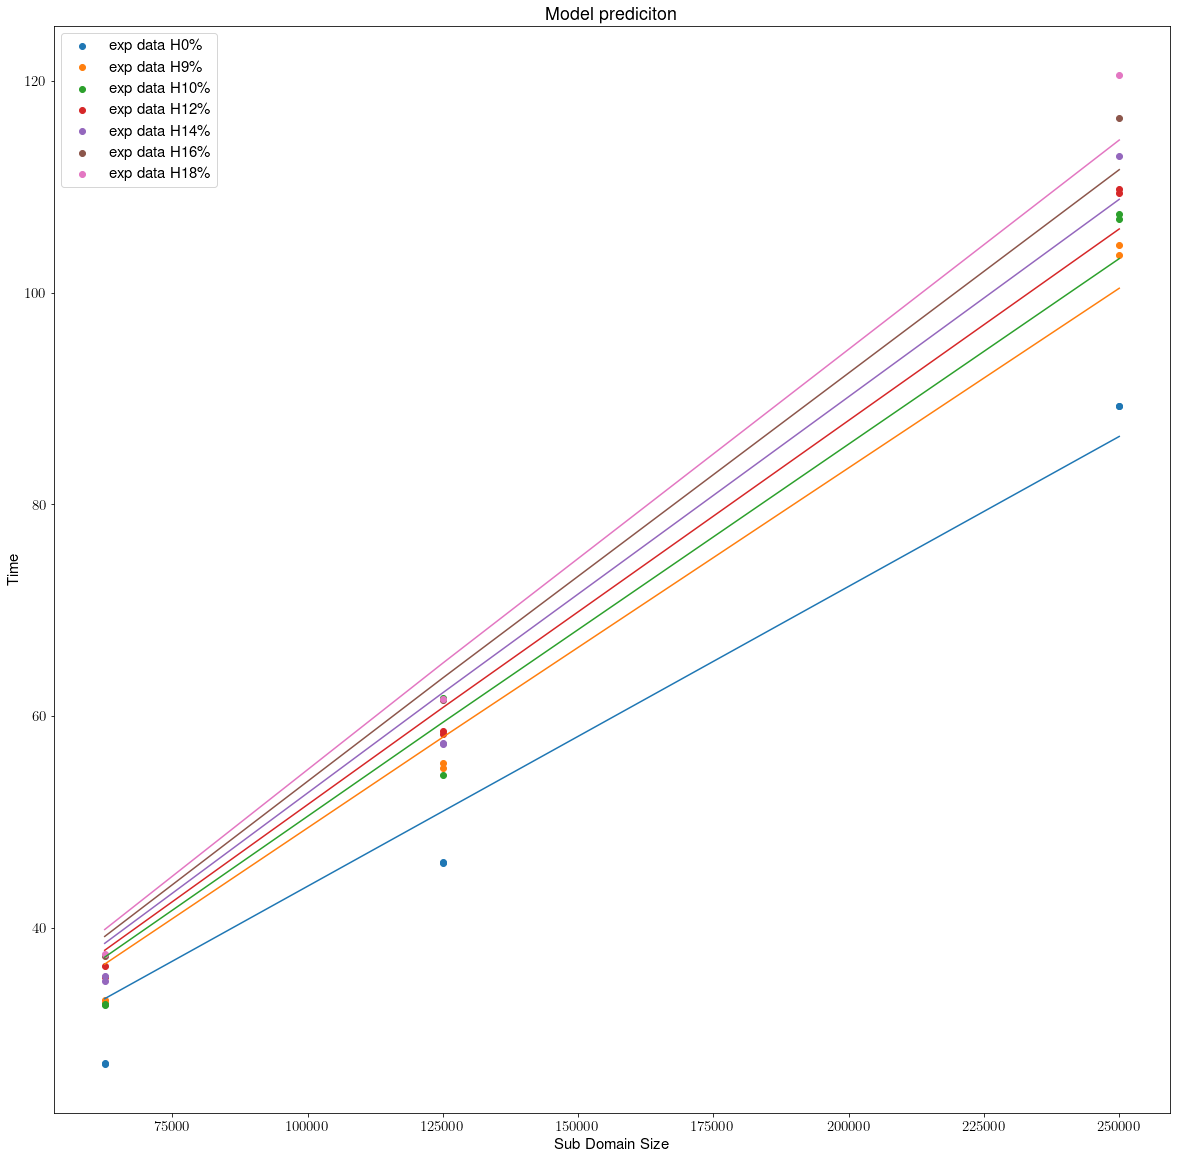

,size,RBCs,mean,std,prediction,mse
0,"(25, 50, 50)",0.000000,27.192589,0.031911,33.303255,37.34
1,"(50, 50, 50)",0.000000,46.208537,0.045713,51.004945,23.01
2,"(50, 100, 50)",0.000000,89.268214,0.021516,86.408326,8.18
3,"(25, 50, 50)",7.291667,33.023145,0.162247,36.569572,12.60
4,"(50, 50, 50)",15.625000,55.349673,0.223212,58.004197,7.10
5,"(50, 100, 50)",31.250000,104.029154,0.459278,100.406828,13.33
6,"(25, 50, 50)",8.750000,32.776971,0.058595,37.222836,19.77
7,"(50, 50, 50)",18.750000,58.042726,3.644367,59.404047,15.13
8,"(50, 100, 50)",37.500000,107.171256,0.238396,103.206529,15.78
9,"(25, 50, 50)",10.208333,35.849750,0.530046,37.876099,4.39


In [10]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.array(new, dtype=object)

new_data = []
for H in set(tmpdf['H']):
    d = tmpdf.loc[tmpdf['H'] == H]
    plt.scatter(d['N'], d['total'], label='exp data H{}\%'.format(H))
    setups = unique([list(x) for x in zip(d['N'], d['size'], d['RBCs'])])
    predictions = [ run_model(models, s, r) for _, s, r in setups]
    plt.plot(setups[:,0], predictions)
    
    for _, size, rbc in setups:
        tmp = tmpdf.loc[tmpdf['size'] == size]
        tmp = tmp.loc[tmpdf['RBCs'] == rbc]
        if len(tmp['total']) == 0:
            continue

        prediciton = run_model(models, size, rbc)
        mse = ((np.array(tmp['total']) - prediciton)**2).mean()
#         rse = ((tmp['total'] - prediciton) ** 2).sum() / ((tmp['total'] - tmp['total'].mean()) ** 2).sum()

        new_data.append([size, rbc, np.mean(tmp['total']), np.std(np.array(tmp['total'])), prediciton, mse.round(2)])



plt.legend()

plt.title("Model prediciton")
plt.xlabel("Sub Domain Size")
plt.ylabel("Time")
plt.savefig("Model_prediction.pdf")
plt.show()

predictiondf = pd.DataFrame(new_data, columns=['size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
predictiondf

   sizestr           size       N   H       RBCs  n
13      s2   (25, 50, 50)   62500  18  14.583333  1
12      s2   (25, 50, 50)   62500  16  13.125000  1
11      s2   (25, 50, 50)   62500  14  11.666667  2
8       s2   (25, 50, 50)   62500   9   7.291667  2
9       s2   (25, 50, 50)   62500  10   8.750000  2
7       s2   (25, 50, 50)   62500   0   0.000000  2
10      s2   (25, 50, 50)   62500  12  10.208333  2
27      s4   (50, 50, 50)  125000  18  31.250000  1
26      s4   (50, 50, 50)  125000  16  28.125000  1
25      s4   (50, 50, 50)  125000  14  25.000000  2
24      s4   (50, 50, 50)  125000  12  21.875000  2
23      s4   (50, 50, 50)  125000  10  18.750000  2
22      s4   (50, 50, 50)  125000   9  15.625000  2
21      s4   (50, 50, 50)  125000   0   0.000000  2
35      s6  (50, 100, 50)  250000   0   0.000000  2
36      s6  (50, 100, 50)  250000   9  31.250000  2
37      s6  (50, 100, 50)  250000  10  37.500000  2
38      s6  (50, 100, 50)  250000  12  43.750000  2
39      s6  

([<matplotlib.axis.XTick at 0x7f768ee177f0>,
 [Text(0, 0, '(25, 50, 50)'),
  Text(1, 0, '(50, 50, 50)'),
  Text(2, 0, '(50, 100, 50)')])

<Figure size 1440x1440 with 0 Axes>

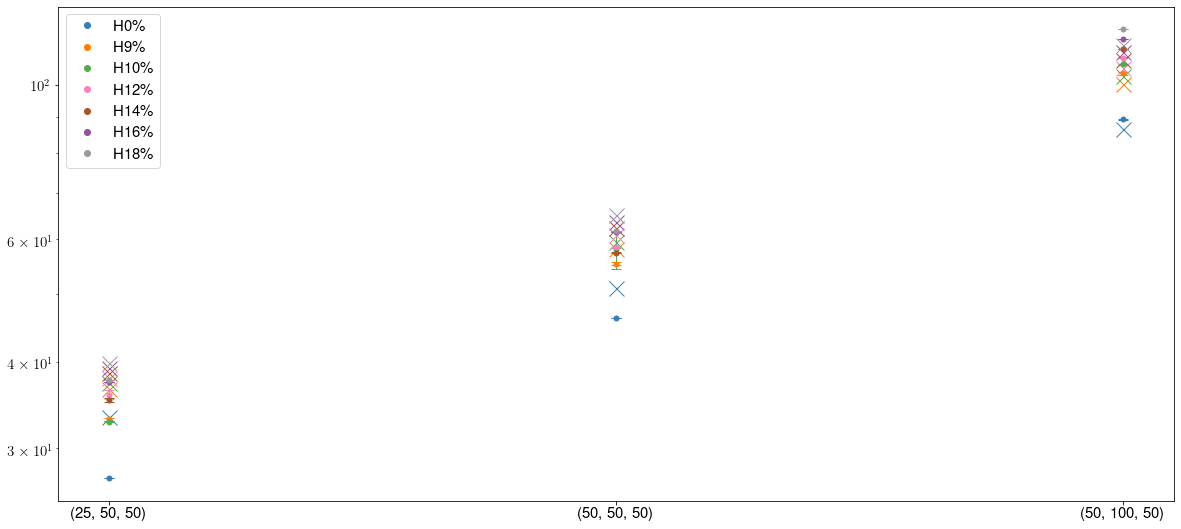

In [11]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = raw_df.loc[raw_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['N'])[0], np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['H'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'N', 'size', 'RBCs', 'H', 'total'])
plt.figure(figsize=(20, 20))

# print(tmpdf)    print(d['N'])

def unique(x, axis=0):
    seen = []
    new = []
    
    for tmp in x:
        if tmp[axis] not in seen:
            seen.append(tmp[axis])
            new.append(tmp)
    return np.sort(np.array(new, dtype=object), axis=0)

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(2, 1, 1)

fit_exp_df = exp_df.loc[exp_df['sizestr'].isin(testing_sizes)].sort_values("N")
print(fit_exp_df)


for i, sizestr in enumerate(pd.unique(fit_exp_df['sizestr'])):
    s = np.array(fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]['size'])[0]
    
    legend_handels = []
    for hi, H in enumerate(np.unique(np.sort(fit_exp_df['H']))):
        t = fit_exp_df.loc[fit_exp_df['sizestr'] == sizestr]
        r = np.array(t.loc[t['H'] == H]['RBCs'])[0]

        tmp = tmpdf.loc[tmpdf['H'] == H]
        tmp = tmp.loc[tmp['size'] == s]
        
        plt.errorbar(i, np.mean(tmp['total']), yerr=np.std(tmp['total']), ms=10, color=CB_color_cycle[hi], fmt=".", capsize=5, lw=1, )
        plt.plot(i, run_model(models, s, r), 'x', color=CB_color_cycle[hi], ms=15)
        
        legend_handels.append( Line2D([0], [0], color=CB_color_cycle[hi], lw=0, marker='o', label='H{}\%'.format(H)))
        

plt.legend(handles=legend_handels)
ax.set_yscale('log')
# plt.xticks(, pd.unique(fit_exp_df['sizestr']), rotation='vertical')
plt.xticks(range(np.unique(np.sort(fit_exp_df['sizestr'])).size), [np.array(fit_exp_df.loc[fit_exp_df['sizestr']==x]['size'])[0] for x in pd.unique(fit_exp_df['sizestr'])])

In [12]:
ids = np.unique(testing_df['jobid'])

new_data = []

for i in ids:
    tmpdf = testing_df.loc[testing_df['jobid'] == i]
    new_data.append([i, np.array(tmpdf['size'])[0], np.array(tmpdf['RBCs'])[0], np.array(tmpdf['total']).sum()])

tmpdf = pd.DataFrame(new_data, columns=['jobid', 'size', 'RBCs', 'total'])

sizes = np.unique(tmpdf['size'])
RBCs = np.unique(tmpdf['RBCs'])

new_data = []
for size in sizes:
    for rbc in RBCs:
        tmp = tmpdf.loc[tmpdf['size'] == size]
        tmp = tmp.loc[tmpdf['RBCs'] == rbc]
        if len(tmp['total']) == 0:
            continue
        
        prediciton = run_model(models, size, rbc)
        mse = ((np.array(tmp['total']) - prediciton) ** 2).mean()

        new_data.append([size, rbc.round(2), np.mean(tmp['total']).round(2), np.std(np.array(tmp['total'])).round(2), prediciton.round(2), mse.round(2)])
        
predictiondf = pd.DataFrame(new_data, columns=['size', 'RBCs', 'mean', 'std', 'prediction', 'mse'])
print(predictiondf.to_latex())

\begin{tabular}{llrrrrr}
\toprule
{} &           size &   RBCs &    mean &   std &  prediction &    mse \\
\midrule
0  &   (25, 50, 50) &   0.00 &   27.19 &  0.03 &       33.30 &  37.34 \\
1  &   (25, 50, 50) &   7.29 &   33.02 &  0.16 &       36.57 &  12.60 \\
2  &   (25, 50, 50) &   8.75 &   32.78 &  0.06 &       37.22 &  19.77 \\
3  &   (25, 50, 50) &  10.21 &   35.85 &  0.53 &       37.88 &   4.39 \\
4  &   (25, 50, 50) &  11.67 &   35.23 &  0.22 &       38.53 &  10.94 \\
5  &   (25, 50, 50) &  13.12 &   37.31 &  0.00 &       39.18 &   3.49 \\
6  &   (25, 50, 50) &  14.58 &   37.57 &  0.00 &       39.84 &   5.15 \\
7  &   (50, 50, 50) &   0.00 &   46.21 &  0.05 &       51.00 &  23.01 \\
8  &   (50, 50, 50) &  15.62 &   55.35 &  0.22 &       58.00 &   7.10 \\
9  &   (50, 50, 50) &  18.75 &   58.04 &  3.64 &       59.40 &  15.13 \\
10 &   (50, 50, 50) &  21.88 &   58.41 &  0.13 &       60.80 &   5.76 \\
11 &   (50, 50, 50) &  25.00 &   57.40 &  0.04 &       62.20 &  23.08 \\
12 &   (